<a href="https://colab.research.google.com/github/akhandait/advanced-machine-learning-with-neural-networks-homeworks/blob/main/homeworks/hw1_problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1 | Problem 3

In [45]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Generate a 3D checkerboard pattern

# def create_3d_checkerboard(size=32, block_size=4):
#     pattern = np.indices((size, size, size)).sum(axis=0) // block_size
#     checkerboard = pattern % 2
#     return checkerboard.astype(np.float32)

# When block sizes were kept same across all 3 dimensions, the 3 orthogonal slices of the output
# were identical for each filter. Therefore, I then used different block sizes for each dimension in the initial
# image to add complexity.

def create_3d_checkerboard(size=32, block_sizes=(4, 6, 8)):
    bx, by, bz = block_sizes
    x, y, z = np.indices((size, size, size))
    pattern = (x // bx + y // by + z // bz)
    checkerboard = pattern % 2
    return checkerboard.astype(np.float32)

checkerboard_3d = create_3d_checkerboard()
volume = torch.tensor(checkerboard_3d).unsqueeze(0).unsqueeze(0)  # shape: (1, 1, D, H, W)
print("3D checkerboard shape:", volume.shape)

3D checkerboard shape: torch.Size([1, 1, 32, 32, 32])


In [35]:
def plot_image(image):
    """Render an image."""
    plt.imshow(image, cmap="gray", aspect="equal", vmin=-2, vmax=2,
               extent=[0, image.shape[1], 0, image.shape[0]])
    plt.colorbar()

    plt.grid(color="red", linewidth=1)
    plt.xticks(range(0, image.shape[1] + 1, 5))
    plt.yticks(range(0, image.shape[0] + 1, 5))

    plt.show()

In [36]:
print(volume[0, 0, 1])

tensor([[0., 0., 0.,  ..., 1., 1., 0.],
        [0., 0., 1.,  ..., 1., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 0.,  ..., 0., 1., 1.],
        [1., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.]])


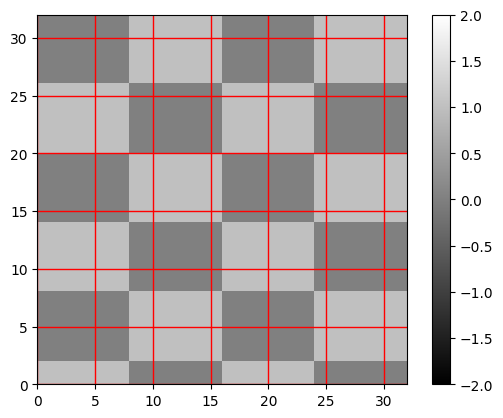

In [43]:
plot_image(volume[0, 0, 2])

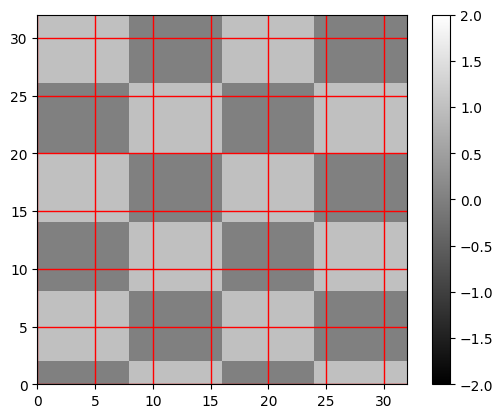

In [44]:
plot_image(volume[0, 0, 5])

In [49]:
# Define 3D averaging kernel
avg_kernel = torch.ones((1, 1, 3, 3, 3)) / 27.0
conv_avg = nn.Conv3d(1, 1, kernel_size=3, bias=False)
conv_avg.weight = nn.Parameter(avg_kernel)

# Apply 3D averaging
avg_result = conv_avg(volume)
print("Averaging done.")

Averaging done.


In [50]:
# Define 3D edge detection kernel (simple Laplacian)
laplacian_kernel = torch.tensor(
    [[[[[0, 0, 0],
        [0, -1, 0],
        [0, 0, 0]],

       [[0, -1, 0],
        [-1, 6, -1],
        [0, -1, 0]],

       [[0, 0, 0],
        [0, -1, 0],
        [0, 0, 0]]]]], dtype=torch.float32)

conv_edge = nn.Conv3d(1, 1, kernel_size=3, bias=False)
conv_edge.weight = nn.Parameter(laplacian_kernel)

# Apply 3D edge detection
edge_result = conv_edge(volume)
print("Edge detection done.")

Edge detection done.


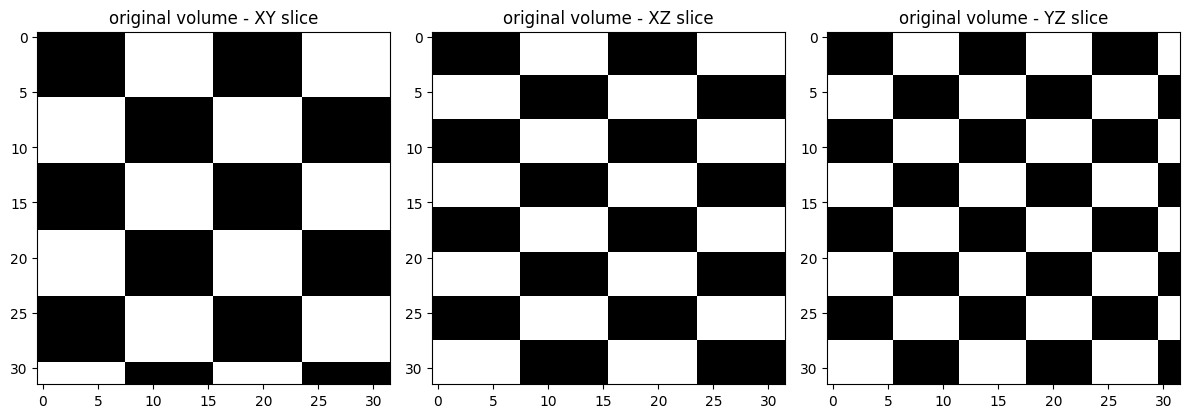

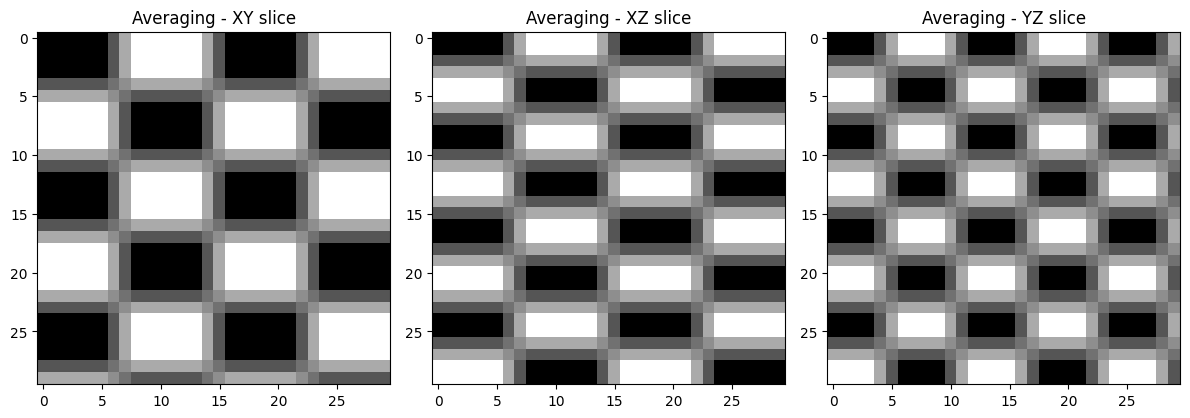

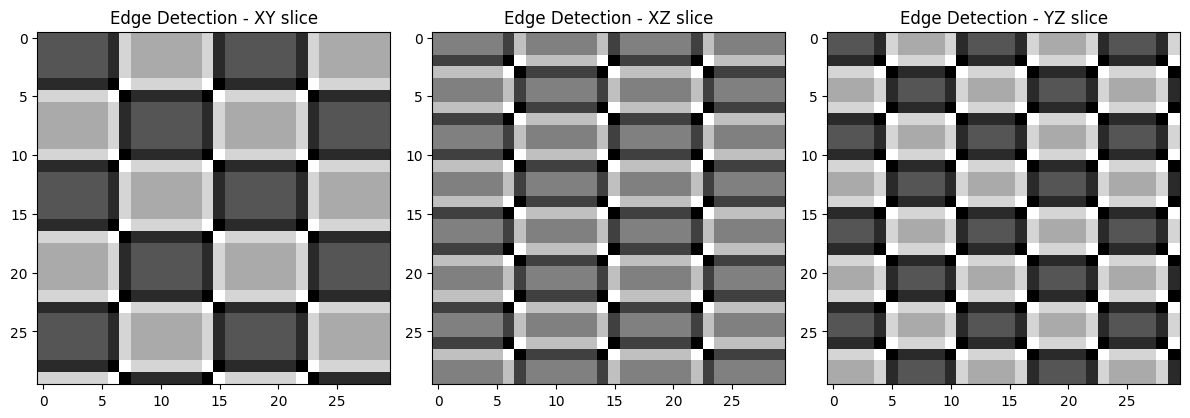

In [53]:
# Helper function to plot three orthogonal slices
def plot_slices(tensor, title, idx=None):
    data = tensor.squeeze().detach().numpy()
    D, H, W = data.shape
    if idx is None:
        idx = (D//2, H//2, W//2)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(data[idx[0], :, :], cmap='gray')
    axs[0].set_title(f'{title} - XY slice')
    axs[1].imshow(data[:, idx[1], :], cmap='gray')
    axs[1].set_title(f'{title} - XZ slice')
    axs[2].imshow(data[:, :, idx[2]], cmap='gray')
    axs[2].set_title(f'{title} - YZ slice')
    plt.tight_layout()
    plt.show()

plot_slices(volume, "original volume")
plot_slices(avg_result, "Averaging")
plot_slices(edge_result, "Edge Detection")